In [13]:
import numpy as np
import math
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
file = Path('/Users/varunbabbar/Downloads/Pizza.csv')
df = pd.read_csv(file)

relevant_parameters = df.iloc[:,2:len(df)]
# relevant_parameters = relevant_parameters[['prot', 'mois', 'fat', 'ash','sodium','cal','carb']]
X = relevant_parameters.to_numpy()

def num_principal_components(n):
    U,S,VT = np.linalg.svd(X,full_matrices=False)
    S = np.diag(S)
    C = np.dot(U[:,0:n],S[0:n,0:n])
    Cx =C
    C = np.dot(C,VT[0:n,:])
    print('Percentage of variance in data explained by {} components: {}'.format(n,np.trace(S[0:n,0:n])/(np.trace(S))))
    return C,np.transpose(VT[0:n,:])

X_pca,V = num_principal_components(4)
df2 = pd.DataFrame(X_pca)
X_reduced_dimension = np.dot(X_pca,V)
df3 = pd.DataFrame(X_reduced_dimension)
# X_pca is a version of X with a reduced number of principal components, but with the same dimensions
# If the dimensionally reduced representation is desirable, then simply perform Y = X*V = UA 
# Essentially, V consists of the set of k principal orthogonal eigenvectors. 
# The dataset X_reduced_dimension is the change of basis to the one defined by the k principal eigenvectors. 
# So we take the component of X_pca in the directions of the principal eigenvectors
print(df.head())
print(df2.head())
print(df3.head())

Percentage of variance in data explained by 4 components: 0.9942360754211872
  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
           0          1          2         3         4         5         6
0  27.820518  21.429386  44.878246  5.095227  1.587419  0.769346  4.928841
1  28.494747  21.280559  43.921081  5.022525  1.552131  1.014564  4.846469
2  28.350245  19.991294  45.780742  5.061199  1.637011  0.799611  4.953472
3  30.548545  20.140696  43.124416  4.906205  1.534570  1.381320  4.743473
4  30.489505  21.274024  41.652506  4.878448  1.465455  1.760300  4.671704
           0          1          2         3
0 -44.744240 -24.988504 -25.961168  0.410778
1 -44.97016

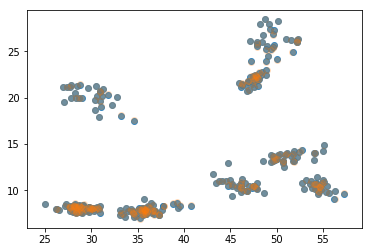

In [14]:
plt.scatter(X[:, 0], X[:, 1],alpha=0.8)
plt.scatter(X_pca[:,0],X_pca[:,1],alpha = 0.2)
plt.axis('equal');